# PARTE 2 - Ejercicios sobre Numeros Aleatorios

## Task 1

### Graficar las distribuciones

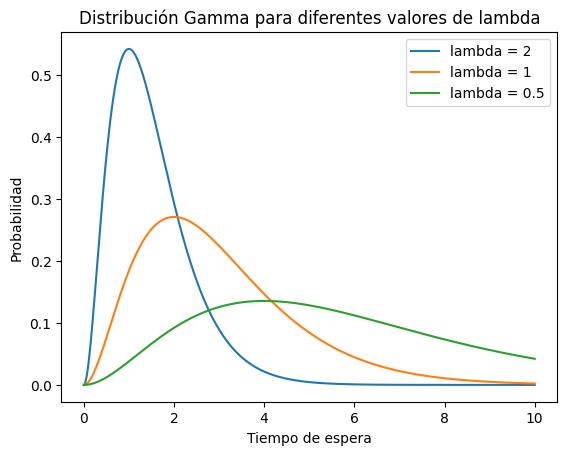

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parámetro de forma
k = 3

# Diferentes valores de lambda
lambdas = [2, 1, 0.5]

# Rango de x para el gráfico
x = np.linspace(0, 10, 1000)

# Crear una figura y un conjunto de subgráficos
fig, ax = plt.subplots(1, 1)

# Iterar sobre los diferentes valores de lambda
for lam in lambdas:
    # Calcular la distribución gamma para cada x
    y = gamma.pdf(x, k, scale=1/lam)
    # Dibujar el gráfico
    ax.plot(x, y, label=f'lambda = {lam}')

# Configurar el gráfico
ax.set_title('Distribución Gamma para diferentes valores de lambda')
ax.set_xlabel('Tiempo de espera')
ax.set_ylabel('Probabilidad')
ax.legend()

# Mostrar el gráfico
plt.show()


### Conclusiones

* A medida que aumenta el valor de lambda, la distribución Gamma se desplaza hacia la izquierda. Esto significa que a medida que aumenta la tasa de ocurrencia de los carros (lambda), se espera que el tiempo de espera para que pasen 3 carros disminuya.

* La relación entre el tiempo de espera y el número de ocurrencias de un evento está dada por el parámetro lambda en este contexto. A mayor lambda, menor será el tiempo de espera, lo que significa que los carros pasan con más frecuencia. A menor lambda, mayor será el tiempo de espera, lo que indica que los carros pasan con menos frecuencia.

## Task 2

### Ejercicio 1. Histogramas

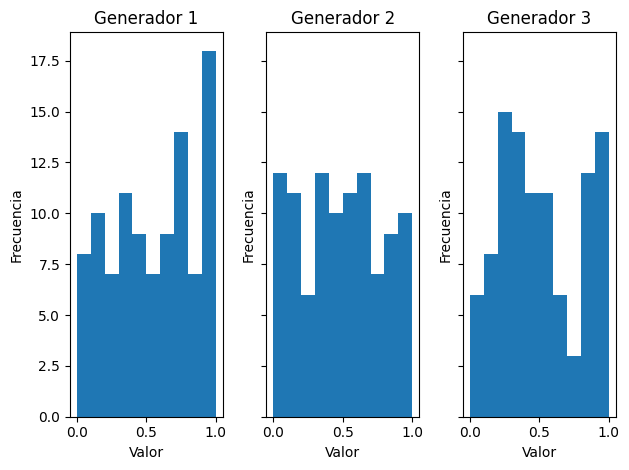

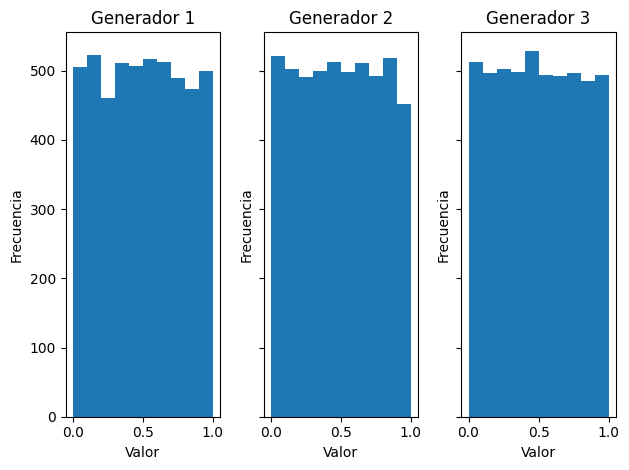

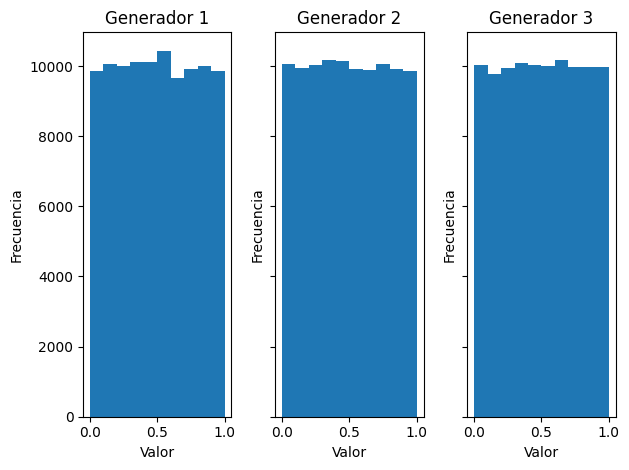

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Definimos los generadores
def gen1(x0, n):
    m = 2**35 - 1
    a = 5**5
    x = x0
    for _ in range(n):
        x = (a * x) % m
        yield x/m

def gen2(x0, n):
    m = 2**31 - 1
    a = 7**5
    x = x0
    for _ in range(n):
        x = (a * x) % m
        yield x/m

def gen3(n):
    for _ in range(n):
        yield np.random.random()

# Definimos la función que dibuja el histograma
def compare_generators(x0, n):
    labels = ['Generador 1', 'Generador 2', 'Generador 3']
    generators = [gen1(x0, n), gen2(x0, n), gen3(n)]
    bins = np.linspace(0, 1, 11)

    fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

    for ax, generator, label in zip(axs, generators, labels):
        ax.hist(list(generator), bins=bins)
        ax.set_title(label)
        ax.set_xlabel('Valor')
        ax.set_ylabel('Frecuencia')

# Ejecutamos para 100, 5,000 y 100,000 repeticiones.
for n in [100, 5000, 100000]:
    seed = 20010303
    compare_generators(seed, n)
    plt.show()




In [29]:
# Histograma con aristas

def histogram(generator, n, name):
    bins = [0] * 10
    for val in generator:
        bins[int(val * 10)] += 1

    print(f"\n{name} - {n} repeticiones")
    for i, b in enumerate(bins):
        print(f"{i/10:.1f}-{(i+1)/10:.1f}: {'*' * (b * 100 // n)} ({b},{b*100/n:.2f}%)")

def compare_generators(x0, n):
    generators = [('Generador 1', gen1(x0, n)), 
                  ('Generador 2', gen2(x0, n)), 
                  ('Generador 3', gen3(n))]
    for name, generator in generators:
        histogram(generator, n, name)

for n in [100, 5000, 100000]:
    compare_generators(1, n)



Generador 1 - 100 repeticiones
0.0-0.1: ******** (8,8.00%)
0.1-0.2: ********* (9,9.00%)
0.2-0.3: *********** (11,11.00%)
0.3-0.4: *********** (11,11.00%)
0.4-0.5: *********** (11,11.00%)
0.5-0.6: ******* (7,7.00%)
0.6-0.7: ******** (8,8.00%)
0.7-0.8: ********** (10,10.00%)
0.8-0.9: ************* (13,13.00%)
0.9-1.0: ************ (12,12.00%)

Generador 2 - 100 repeticiones
0.0-0.1: ************** (14,14.00%)
0.1-0.2: *** (3,3.00%)
0.2-0.3: ********** (10,10.00%)
0.3-0.4: ********* (9,9.00%)
0.4-0.5: ********** (10,10.00%)
0.5-0.6: *********** (11,11.00%)
0.6-0.7: ********** (10,10.00%)
0.7-0.8: ************ (12,12.00%)
0.8-0.9: ********* (9,9.00%)
0.9-1.0: ************ (12,12.00%)

Generador 3 - 100 repeticiones
0.0-0.1: **************** (16,16.00%)
0.1-0.2: ********* (9,9.00%)
0.2-0.3: ********* (9,9.00%)
0.3-0.4: *********** (11,11.00%)
0.4-0.5: ********** (10,10.00%)
0.5-0.6: *********** (11,11.00%)
0.6-0.7: ************ (12,12.00%)
0.7-0.8: ********* (9,9.00%)
0.8-0.9: **** (4,4.00

### Ejercicio 2. Que generador le parece mejor?

En lo que podemos observar de los histogramas el generador 2 parece tener un mejor comportamiento, ya que se observa que los valores se distribuyen de manera más uniforme, mientras que en el generador 1 se observa que los valores varian mucho más, por lo que no se distribuyen de manera uniforme. Aunque con 100 000 iteraciones los 2 generadores son igual de buenos y la distribucion es bastante pareja debido a la ley de los numeros grandes.

## Task 3 Transoformacionde Integral

### Ejercicio 1. Transformacion de integral


In [27]:
from IPython.display import display, Math



display(Math(r"\int_{-\infty}^{\infty} e^{-x^2} dx"))

print("Haremos un intercambio de variables para resolver la integral")

# X = tan(pi* z - pi/2)
display(Math(r"x = tan(\pi z - \frac{\pi}{2})"))

# dx = pi * sec^2(pi*z - pi/2) dz
display(Math(r"dx = \pi sec^2(\pi z - \frac{\pi}{2}) dz"))

print("Sustituimos en la integral")

display(Math(r"\int_{0}^{1} e^{-\tan^2(\pi z - \frac{\pi}{2})} \pi \sec^2(\pi z - \frac{\pi}{2}) dz"))


<IPython.core.display.Math object>

Haremos un intercambio de variables para resolver la integral


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Sustituimos en la integral


<IPython.core.display.Math object>

### Ejercicio 2

In [19]:
import numpy as np

# Definimos la función para la integral transformada
def f(u):
    x = np.tan(np.pi * (u - 0.5))
    return np.exp(-x**2) * np.abs(np.pi * (1 + x**2))

# Definimos el método de Montecarlo
def montecarlo_integration(n):
    u = np.random.uniform(0, 1, n)
    integral_approximation = np.mean(f(u))
    return integral_approximation

# Realizamos la aproximación de la integral para diferentes números de iteraciones
for n in [100, 10000, 100000]:
    print(f'La aproximación de la integral con {n} iteraciones es {montecarlo_integration(n)}')


La aproximación de la integral con 100 iteraciones es 1.444531145979004
La aproximación de la integral con 10000 iteraciones es 1.7820538574779177
La aproximación de la integral con 100000 iteraciones es 1.7731095975127662


## Task 4 Transoformacionde Integral

### Ejercicio 1. Transformacion de integral


In [35]:
from sympy import symbols, Integral, exp, oo
from sympy.abc import x, y
from IPython.display import display, Math

# Definimos la función a integrar
f = exp(-(x + y))

# Mostramos la integral doble original
display(Math(r"\int_{{0}}^{{\infty}} \int_{{0}}^{{x}} e^{{-(x+y)}} dy dx"))

print("Resolvemos la integral interna primero")

# Resolvemos la integral interna
inner_integral = Integral(f, (y, 0, x))
inner_solution = inner_integral.doit()

# Mostramos la solución de la integral interna
display(Math(r"\int_{{0}}^{{x}} e^{{-(x+y)}} dy = " + str(inner_solution)))

print("Sustituimos la solución en la integral externa y resolvemos")

# Sustituimos la solución en la integral externa
outer_integral = Integral(inner_solution, (x, 0, oo))
outer_solution = outer_integral.doit()

# Mostramos la solución de la integral externa
display(Math(r"\int_{{0}}^{{\infty}} " + str(inner_solution) + r" dx = " + str(outer_solution)))


<IPython.core.display.Math object>

Resolvemos la integral interna primero


<IPython.core.display.Math object>

Sustituimos la solución en la integral externa y resolvemos


<IPython.core.display.Math object>

In [36]:
import numpy as np

def integrand(x, y):
    return np.exp(-(x + y))

def monte_carlo_double_integration(n_samples):
    x_samples = np.random.uniform(0, 1, n_samples)
    y_samples = [np.random.uniform(0, x, 1) for x in x_samples]
    return np.mean([integrand(x, y) for x, y in zip(x_samples, y_samples)])

for n in [100, 10000, 100000]:
    print(f'La aproximación de la integral con {n} iteraciones es {monte_carlo_double_integration(n)}')



La aproximación de la integral con 100 iteraciones es 0.5092300744612863
La aproximación de la integral con 10000 iteraciones es 0.5233933772491104
La aproximación de la integral con 100000 iteraciones es 0.522393373187668
